In [19]:
import numpy as np, prjlib, plottools as pl, healpy as hp, misctools, tools_lens, tools_delens, tools_multitracer, binning as bn
from matplotlib.pyplot import *

In [3]:
snmin, snmax = 1, 100
olmax = 1024
klist = ['comb']

In [4]:
pid = prjlib.analysis_init(t='id',ntype='cv',snmin=snmin,snmax=snmax)

SAT mask is further multiplied by hit-count binary


/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 512
  warnings.warn("NSIDE = {0:d}".format(nside))
/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".format(schm))


In [33]:
d = prjlib.data_directory()
dobj = {}
for n in ['base','goal']:
    for ntype in [n,n+'_iso']:
        p = prjlib.analysis_init(t='la',freq='com',fltr='none',snmin=snmin,snmax=snmax,ntype=ntype+'_roll50')
        pE = prjlib.analysis_init(t='co',freq='com',fltr='cinv',ntype=ntype.replace('_iso','')+'_roll50')
        qobj = tools_lens.init_qobj(p.stag,'False',rlmin=300,rlmax=4096)
        mobj = tools_multitracer.mass_tracer(p,qobj,add_cmb=['TT','TE','EE','EB'])
        dobj[ntype] = tools_delens.init_template(p.stag+qobj.ltag,mobj.klist,pE.stag,False,klist=klist,kfltr='none',elmin=50)

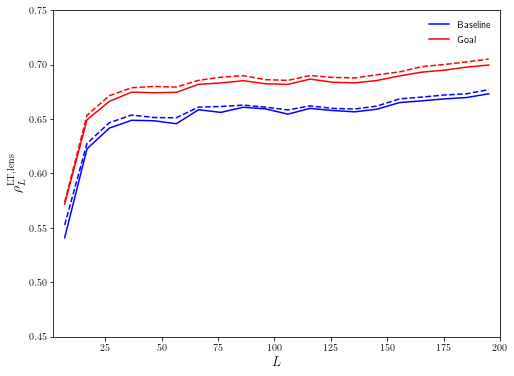

In [35]:
mb = bn.multipole_binning(20,lmin=2,lmax=200)
pl.plot_1dstyle(fsize=[8,6],usetex=True,xmin=2,xmax=200,ymin=.45,ymax=.75,ylab=r'$\rho_L^{\rm LT,lens}$')
for n, co, lab in [('base','b','Baseline'),('goal','r','Goal')]:
    for ntype, ls in [(n,'-'),(n+'_iso','--')]:
        r = 0
        for i in range(snmin,snmax+1):
            BB, TT, BT = np.loadtxt(dobj[ntype].cl['comb'][i],unpack=True)
            r += bn.binning(BT,mb)**2/bn.binning(BB,mb)/bn.binning(TT,mb)
        if 'iso' in ntype: lab=''
        plot(mb.bc,r/(snmax-snmin+1),label=lab,color=co,ls=ls)
legend(loc=0)
savefig('fig_BB_correlation.pdf')